-------------------------------
### Classification - using mnist data

- Loads the MNIST dataset.
- Preprocesses the images and labels (normalizing the images to [0, 1] and one-hot encoding the labels).
- Defines a simple MLP model with two hidden layers.
- Compiles and trains the model.
- Evaluates the model on the test dataset.
- Plots the training and validation accuracy and loss over epochs.
-----------------

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.utils import to_categorical, plot_model

In [18]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

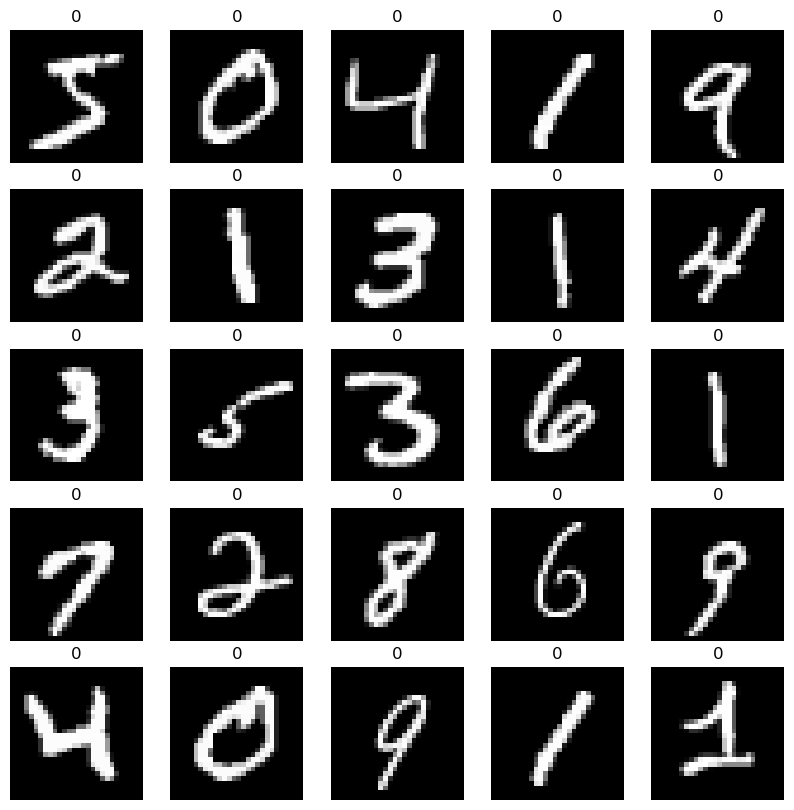

In [20]:
# Plot some samples from MNIST
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(str(np.argmax(train_labels[i])))
    plt.axis('off')

In [21]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32') / 255.0

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [24]:
# Define the MLP model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,  activation='softmax'))  # 10 output units for 10 digits (0-9)

In [25]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

(-0.5, 357.5, 525.5, -0.5)

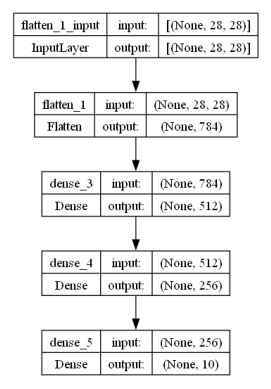

In [26]:
# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model_plot.png'))
plt.axis('off')

In [27]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2013 - accuracy: 0.9398 - val_loss: 0.1277 - val_accuracy: 0.9602
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0838 - accuracy: 0.9739 - val_loss: 0.0968 - val_accuracy: 0.9732
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.1024 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 0.1260 - val_accuracy: 0.9682
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.1143 - val_accuracy: 0.9723
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0990 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.1041 - v

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


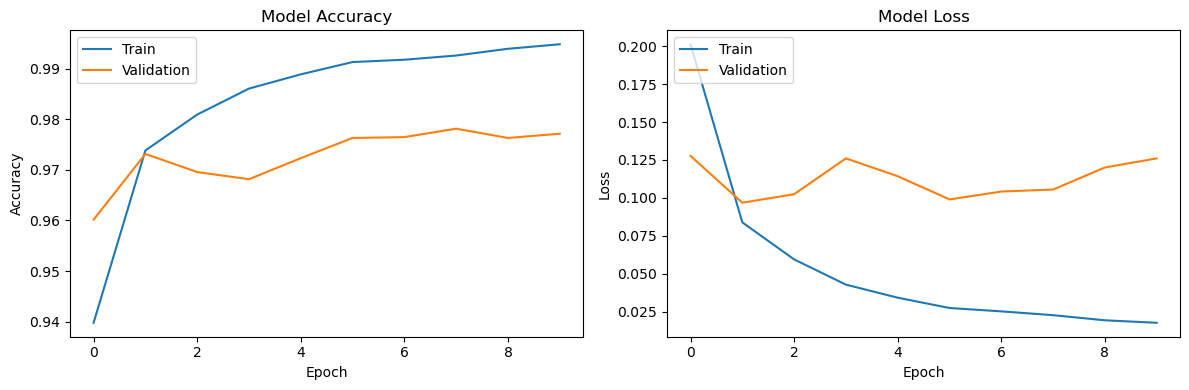

In [29]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()